В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, GRU

**RNN**

In [2]:
max_features_1 = 10000
maxlen_1 = 500
batch_size_1 = 64

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features_1)
input_train = pad_sequences(input_train, maxlen=maxlen_1)
input_test = pad_sequences(input_test, maxlen=maxlen_1)

17464789/17464789 [==============================] - 0s 0us/step


In [26]:
model = Sequential([Embedding(max_features_1, 64), SimpleRNN(64, return_sequences=True), SimpleRNN(64, return_sequences=True), SimpleRNN(64, return_sequences=False), Dense(1, activation='sigmoid')])

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 64)          640000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 64)          8256      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 664,833
Trainable params: 664,833
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

tf_stopping = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True, verbose=1)

callbacks = [tf_stopping]

In [28]:
history = model.fit(input_train, y_train, epochs=5, batch_size=512, callbacks=callbacks, validation_data=(input_test, y_test))

Epoch 1/5
49/49 [==============================] - 98s 2s/step - loss: 0.6902 - acc: 0.5371 - val_loss: 0.6269 - val_acc: 0.6662
Epoch 2/5
49/49 [==============================] - 91s 2s/step - loss: 0.4743 - acc: 0.7739 - val_loss: 0.3666 - val_acc: 0.8434
Epoch 3/5
49/49 [==============================] - 90s 2s/step - loss: 0.2986 - acc: 0.8794 - val_loss: 0.4476 - val_acc: 0.8238
Epoch 4/5
49/49 [==============================] - 86s 2s/step - loss: 0.2329 - acc: 0.9089 - val_loss: 0.3614 - val_acc: 0.8499
Epoch 5/5
49/49 [==============================] - 88s 2s/step - loss: 0.1331 - acc: 0.9530 - val_loss: 0.3878 - val_acc: 0.8548


In [29]:
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 94s 120ms/step - loss: 0.3878 - acc: 0.8548
Test Loss: 0.3878231942653656
Test Accuracy: 0.8547999858856201


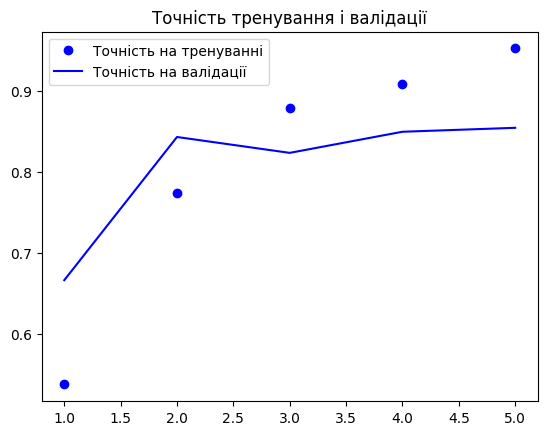

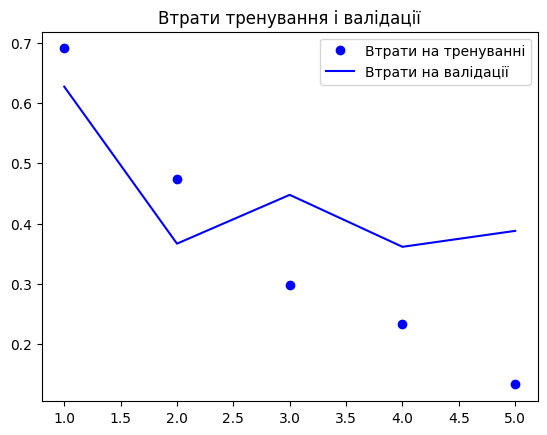

In [30]:
# Відображення результатів:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()

plt.show()


**LSTM**

In [31]:
max_features_2 = 10000
maxlen_2 = 500
batch_size_2 = 128

In [32]:
model_lstm = Sequential([Embedding(max_features_2, 16), LSTM(16, return_sequences=True), LSTM(16), Dense(1, activation='sigmoid')])

In [33]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160000    
                                                                 
 lstm_4 (LSTM)               (None, None, 16)          2112      
                                                                 
 lstm_5 (LSTM)               (None, 16)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 164,241
Trainable params: 164,241
Non-trainable params: 0
_________________________________________________________________


In [34]:
history_lstm = model_lstm.fit(input_train, y_train, epochs=5, batch_size=512, validation_data=(input_test, y_test))

Epoch 1/5
49/49 [==============================] - 63s 232ms/step - loss: 0.6583 - acc: 0.6206 - val_loss: 0.4956 - val_acc: 0.7847
Epoch 2/5
49/49 [==============================] - 8s 170ms/step - loss: 0.4241 - acc: 0.8177 - val_loss: 0.3970 - val_acc: 0.8293
Epoch 3/5
49/49 [==============================] - 8s 166ms/step - loss: 0.3155 - acc: 0.8782 - val_loss: 0.3718 - val_acc: 0.8420
Epoch 4/5
49/49 [==============================] - 8s 168ms/step - loss: 0.2491 - acc: 0.9106 - val_loss: 0.3619 - val_acc: 0.8526
Epoch 5/5
49/49 [==============================] - 7s 145ms/step - loss: 0.2012 - acc: 0.9332 - val_loss: 0.3587 - val_acc: 0.8545


In [35]:
test_loss, test_acc = model_lstm.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 10s 13ms/step - loss: 0.3587 - acc: 0.8545
Test Loss: 0.3587094247341156
Test Accuracy: 0.8545200228691101


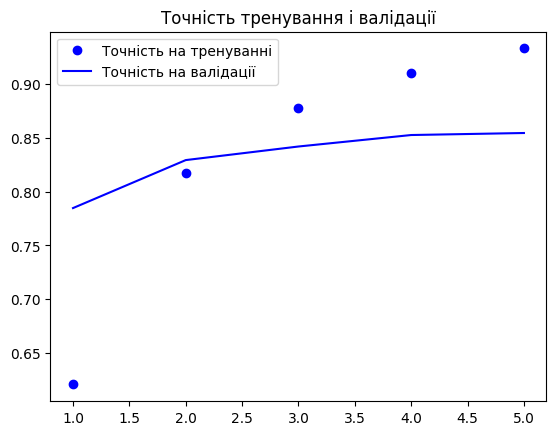

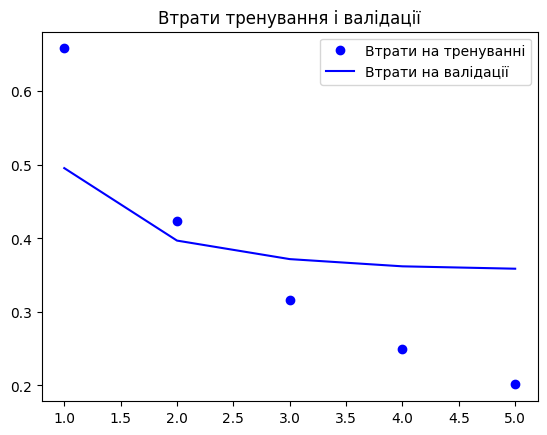

In [36]:
# Відображення результатів:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


**Двостононня**

In [37]:
max_features_3 = 10000
maxlen_3 = 500
batch_size_3 = 128

In [38]:
model_bid = Sequential([Embedding(max_features_3, 32), Bidirectional(LSTM(32)), Dense(1, activation='sigmoid')])

In [39]:
model_bid.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_bid.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [40]:
history_bid = model_bid.fit(input_train, y_train, epochs=5, batch_size=512, validation_data=(input_test, y_test))

Epoch 1/5
49/49 [==============================] - 15s 223ms/step - loss: 0.6682 - acc: 0.6128 - val_loss: 0.6185 - val_acc: 0.7728
Epoch 2/5
49/49 [==============================] - 9s 188ms/step - loss: 0.4937 - acc: 0.8029 - val_loss: 0.4211 - val_acc: 0.8339
Epoch 3/5
49/49 [==============================] - 7s 144ms/step - loss: 0.3403 - acc: 0.8691 - val_loss: 0.3498 - val_acc: 0.8510
Epoch 4/5
49/49 [==============================] - 8s 171ms/step - loss: 0.2624 - acc: 0.9017 - val_loss: 0.3364 - val_acc: 0.8605
Epoch 5/5
49/49 [==============================] - 7s 147ms/step - loss: 0.2132 - acc: 0.9259 - val_loss: 0.3245 - val_acc: 0.8655


In [41]:
test_loss, test_acc = model_bid.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 11s 14ms/step - loss: 0.3245 - acc: 0.8655
Test Loss: 0.32448747754096985
Test Accuracy: 0.8655200004577637


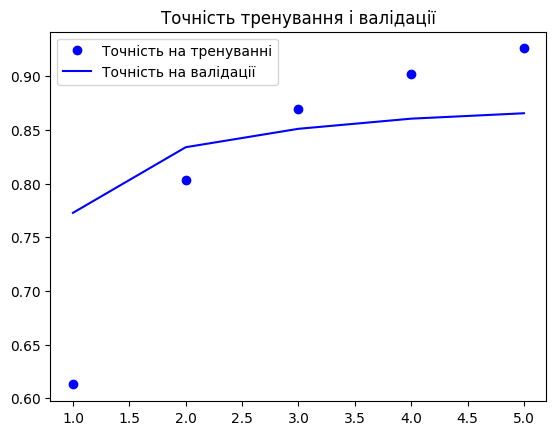

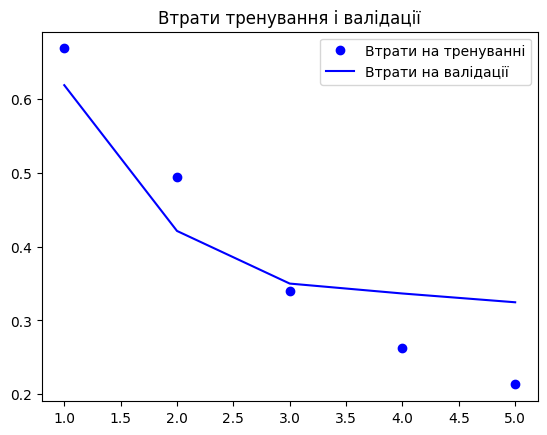

In [42]:
# Відображення результатів:
acc = history_bid.history['acc']
val_acc = history_bid.history['val_acc']
loss = history_bid.history['loss']
val_loss = history_bid.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


**Глибока**

In [43]:
max_features_4 = 10000
maxlen_4 = 500
batch_size_4 = 64

In [49]:
model_gl = Sequential([Embedding(max_features_3, 16), Bidirectional(LSTM(16, return_sequences=True)), Bidirectional(LSTM(16)), Dense(1, activation='sigmoid')])

In [51]:
model_gl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_gl.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 16)          160000    
                                                                 
 bidirectional_5 (Bidirectio  (None, None, 32)         4224      
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 32)               6272      
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 170,529
Trainable params: 170,529
Non-trainable params: 0
_________________________________________________________________


In [52]:
history_gl = model_gl.fit(input_train, y_train, epochs=5, batch_size=512, validation_data=(input_test, y_test))

Epoch 1/5
49/49 [==============================] - 21s 271ms/step - loss: 0.6721 - acc: 0.6159 - val_loss: 0.5527 - val_acc: 0.7699
Epoch 2/5
49/49 [==============================] - 11s 219ms/step - loss: 0.4856 - acc: 0.7920 - val_loss: 0.4453 - val_acc: 0.8184
Epoch 3/5
49/49 [==============================] - 9s 191ms/step - loss: 0.3694 - acc: 0.8596 - val_loss: 0.3856 - val_acc: 0.8411
Epoch 4/5
49/49 [==============================] - 9s 182ms/step - loss: 0.2925 - acc: 0.8964 - val_loss: 0.3739 - val_acc: 0.8458
Epoch 5/5
49/49 [==============================] - 8s 171ms/step - loss: 0.2404 - acc: 0.9209 - val_loss: 0.3703 - val_acc: 0.8558


In [53]:
test_loss, test_acc = model_gl.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 18s 23ms/step - loss: 0.3703 - acc: 0.8558
Test Loss: 0.37025508284568787
Test Accuracy: 0.8558400273323059


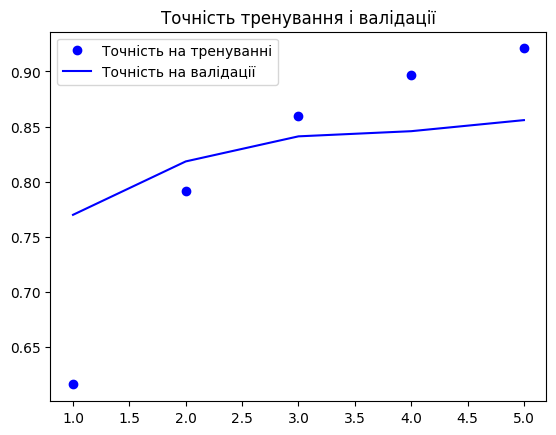

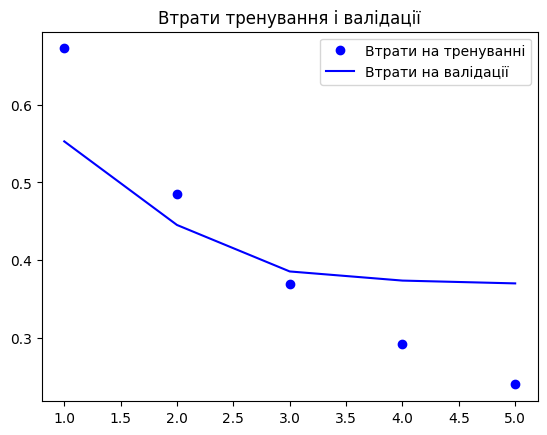

In [54]:
# Відображення результатів:
acc = history_gl.history['acc']
val_acc = history_gl.history['val_acc']
loss = history_gl.history['loss']
val_loss = history_gl.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


**Other models**

In [55]:
max_features_5 = 10000
maxlen_5 = 500
batch_size_5 = 128

In [56]:
model_oth_1 = Sequential([Embedding(max_features_5, 16),
                          GRU(32, return_sequences=True),
                          GRU(128, return_sequences=True),
                          GRU(16),
                          Dense(1, activation="sigmoid")])

In [57]:
model_oth_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model_oth_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          160000    
                                                                 
 gru (GRU)                   (None, None, 32)          4800      
                                                                 
 gru_1 (GRU)                 (None, None, 128)         62208     
                                                                 
 gru_2 (GRU)                 (None, 16)                7008      
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 234,033
Trainable params: 234,033
Non-trainable params: 0
_________________________________________________________________


In [58]:
history_oth_1 = model_oth_1.fit(input_train, y_train, epochs=6, batch_size=512, validation_data=(input_test, y_test))

Epoch 1/6
49/49 [==============================] - 19s 278ms/step - loss: 0.6386 - acc: 0.6178 - val_loss: 0.5063 - val_acc: 0.7482
Epoch 2/6
49/49 [==============================] - 12s 247ms/step - loss: 0.3793 - acc: 0.8337 - val_loss: 0.3539 - val_acc: 0.8464
Epoch 3/6
49/49 [==============================] - 10s 214ms/step - loss: 0.2544 - acc: 0.8988 - val_loss: 0.3901 - val_acc: 0.8217
Epoch 4/6
49/49 [==============================] - 10s 209ms/step - loss: 0.2358 - acc: 0.9104 - val_loss: 0.3319 - val_acc: 0.8642
Epoch 5/6
49/49 [==============================] - 11s 226ms/step - loss: 0.1626 - acc: 0.9441 - val_loss: 0.3629 - val_acc: 0.8636
Epoch 6/6
49/49 [==============================] - 9s 191ms/step - loss: 0.1317 - acc: 0.9590 - val_loss: 0.3876 - val_acc: 0.8558


In [59]:
test_loss, test_acc = model_oth_1.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 14s 18ms/step - loss: 0.3876 - acc: 0.8558
Test Loss: 0.38758596777915955
Test Accuracy: 0.8557599782943726


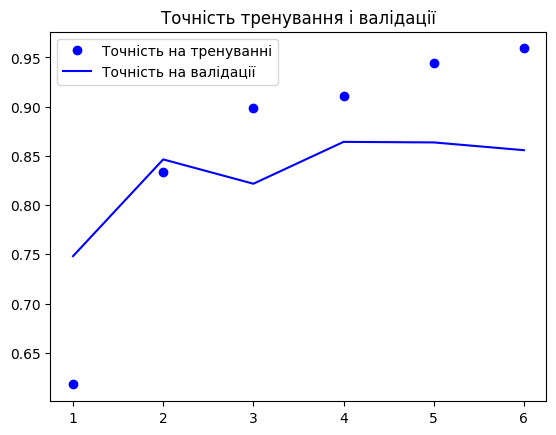

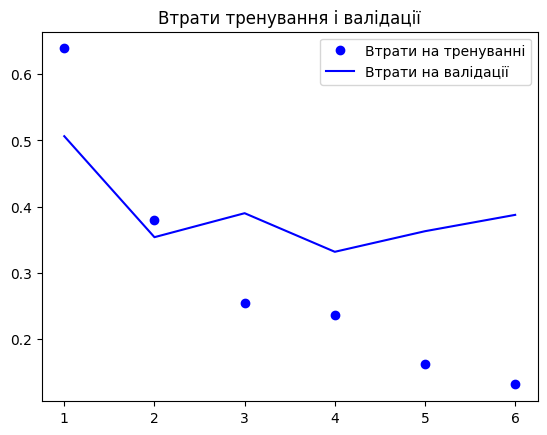

In [60]:
# Відображення результатів:
acc = history_oth_1.history['acc']
val_acc = history_oth_1.history['val_acc']
loss = history_oth_1.history['loss']
val_loss = history_oth_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки


Висновик: Всі моделі навчині за 5 епох до точності 85-87%